In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from IPython.display import display
from wordcloud import WordCloud
import ppscore as pps
from sklearn.cluster import KMeans

In [260]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [227]:
report = ydata_profiling.ProfileReport(train)

In [228]:
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Transported', ylabel='Age'>

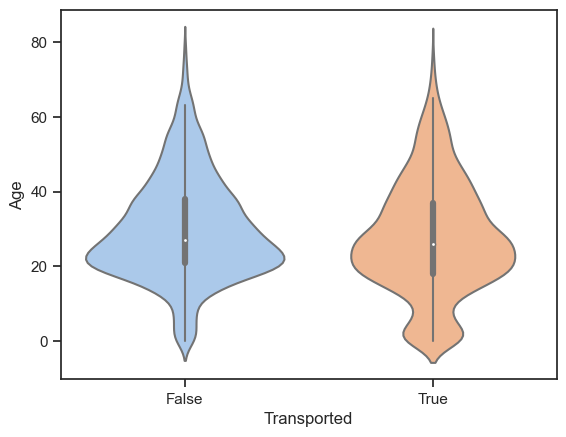

In [229]:
# Age plot of Transported passengers violin plot
sns.violinplot(x='Transported', y='Age', data=train)

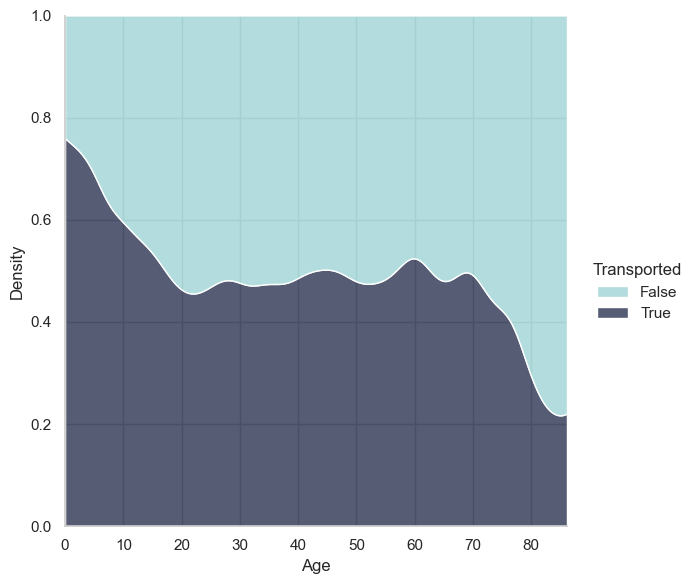

In [230]:
# Distribution plot of Age vs Transported
sns.set_theme(style="whitegrid")

sns.displot(
    data=train,
    x="Age", hue="Transported",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='VIP', ylabel='count'>

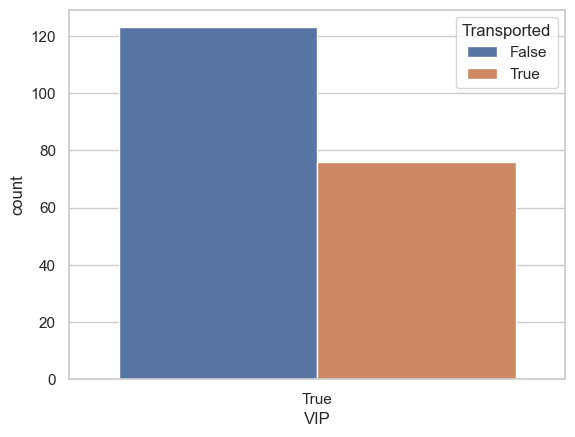

In [231]:
# vip passengers vs. transported
vip = train[train['VIP'] == True]
sns.countplot(x='VIP', hue='Transported', data=vip)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

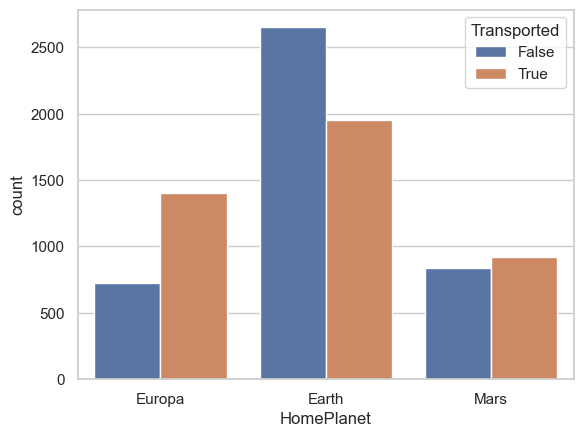

In [232]:
# Home planet vs Transported
sns.countplot(x='HomePlanet', hue='Transported', data=train)

<AxesSubplot:xlabel='Destination', ylabel='count'>

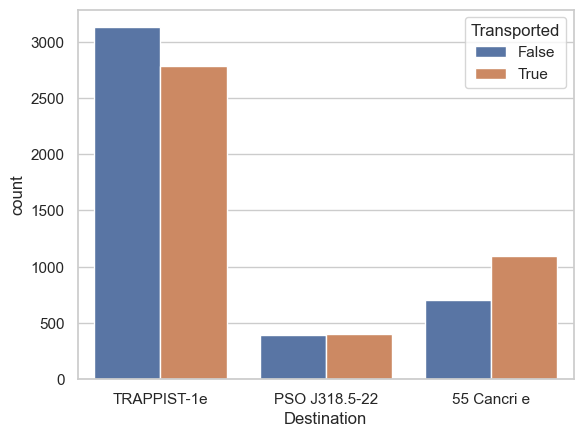

In [233]:
# Destination vs Transported
sns.countplot(x='Destination', hue='Transported', data=train)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

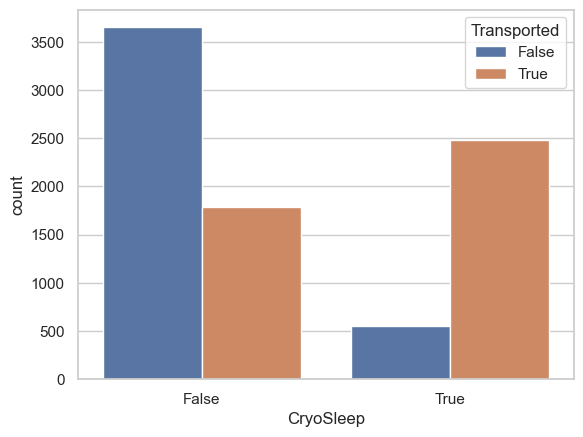

In [234]:
#cryosleep vs transported
sns.countplot(x='CryoSleep', hue='Transported', data=train)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

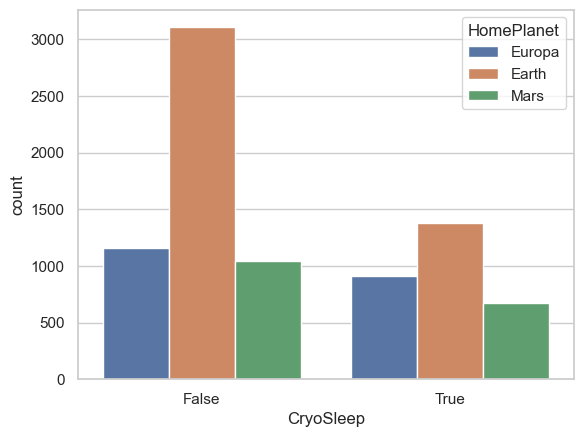

In [235]:
# cryosleep vs homeplanet
sns.countplot(x='CryoSleep', hue='HomePlanet', data=train)

c:\Users\milan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\milan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Transported', ylabel='Age'>

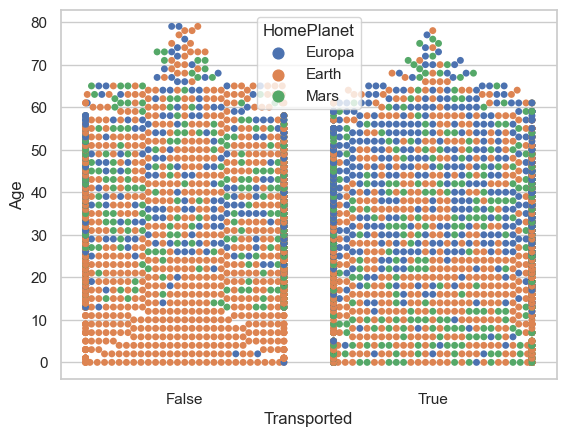

In [236]:
# Transported vs homeplanet vs age swarmplot
sns.swarmplot(x='Transported', y='Age', hue='HomePlanet', data=train)

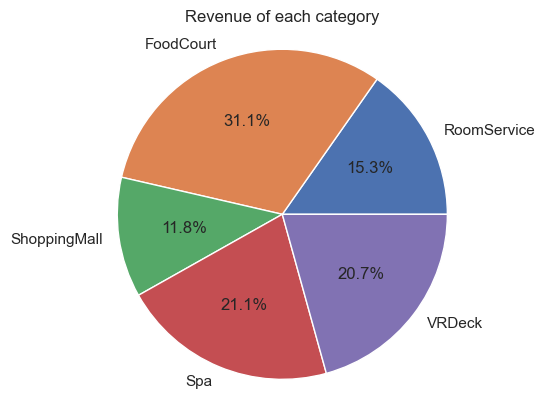

In [237]:
#Revenue of each category
room_service = train['RoomService'].sum()
food_court = train['FoodCourt'].sum()
shopping_mall = train['ShoppingMall'].sum()
spa = train['Spa'].sum()
vr_deck = train['VRDeck'].sum()
# title 'Revenue of each category' pie chart with label "revenue of each category"
fig, ax = plt.subplots()
ax.pie([room_service, food_court, shopping_mall, spa, vr_deck], labels=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Revenue of each category')
plt.show()

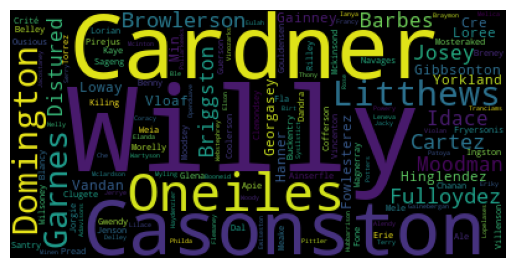

In [238]:
#Word Cloud of Names
names = train['Name'].str.cat(sep=' ')
wordcloud = WordCloud().generate(names)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# pps matrix
matrix_df = pps.matrix(train)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX

<AxesSubplot:xlabel='x', ylabel='y'>

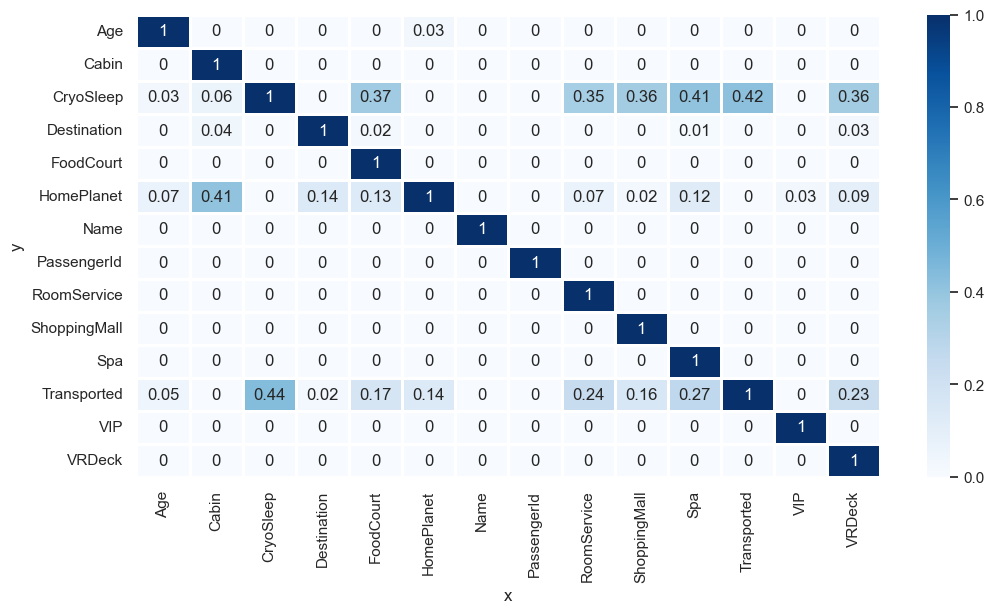

In [255]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)

# Data Cleaning and Feature Engineering

In [261]:
df = train

Creating a Group based on GGGG_PP where GGGG is Group id and PP is passenger id

In [262]:
# create new column group from gggg_pp in passengerId where gggg is group
df['Group'] = df['PassengerId'].str[0:4]
df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('size')
df['IsAlone'] = df['GroupSize'] == 1

Missing *homeplanets* can be filled by using group id and members homeplanet and/or their destination

In [263]:
# Fill missing 'homeplanet' values with the mode value of each group
df['HomePlanet'].fillna(df.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_10972\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_10972\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_10972\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.gr

In [264]:
# Fill missing 'destination' values with the mode value of each group
df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_10972\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_10972\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_10972\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fill

Total Money Spent on Amenities by each passenger

In [265]:
# any nan value in RoomService, FoodCourt, ShoppingMall, Spa, VRDeck will be 0
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)

# total money spent by each person (sum of RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

Age category of each passenger

In [266]:
# Fill missing 'age' values with the mean value of each group
df['Age'].fillna(df.groupby('Group')['Age'].transform('mean'), inplace=True)

In [267]:
# fill df[df['Age'] == 0] with mean age of the group
df[df['Age'] == 0].replace(0, df.groupby('Group')['Age'].transform('mean'), inplace=True)

In [268]:
# fill df[df['Age'] == 0] with 23
df[df['Age'] == 0].replace(0, 23, inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_10972\498587451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age'] == 0].replace(0, 23, inplace=True)


In [269]:

# 'Age_Cat' where age(0 to 18)='Young', age(18 to 56)='Mature', age(56+)='Senior'
df['AgeCat'] = pd.cut(df['Age'], [0, 18, 56, np.inf], labels=['Young', 'Mature', 'Senior'])

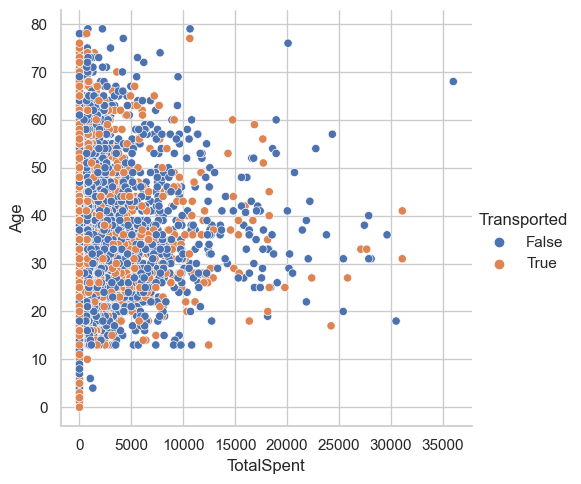

In [270]:
# rel plot of total money spent by each person
sns.relplot(x="TotalSpent", y="Age", hue="Transported", data=df)

In [271]:
# 0-500, 500-12750, 12750+
# MoneySpent in 3 categories (0-500, 500-12750, 12750+)
df['SpendingCat'] = pd.cut(df['TotalSpent'], [-1, 500, 12750, np.inf], labels=['Frugal', 'Avid', 'Roller'])


In [275]:
# spendingcat dtype
df['SpendingCat']

0       Frugal
1         Avid
2         Avid
3         Avid
4         Avid
         ...  
8688      Avid
8689    Frugal
8690      Avid
8691      Avid
8692      Avid
Name: SpendingCat, Length: 8693, dtype: category
Categories (3, object): ['Frugal' < 'Avid' < 'Roller']

In [272]:
df.sample(5)

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
7284     7788_01      Earth     False  F/1488/S  PSO J318.5-22  43.0  False   
7149     7627_01     Europa     False    A/92/S    55 Cancri e  63.0  False   
2181     2336_01     Europa      True    A/30/S    55 Cancri e  45.0  False   
340      0378_05     Europa      True    B/11/S    TRAPPIST-1e  13.0  False   
2179     2332_01      Earth     False   F/453/S    TRAPPIST-1e  21.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
7284          0.0        0.0         110.0   538.0     0.0     Julin Guerson   
7149          0.0     5036.0           4.0   519.0     0.0   Beide Reeddommy   
2181          0.0        0.0           0.0     0.0     0.0  Alhail Fulatorly   
340           0.0        0.0           0.0     0.0     0.0   Polaton Pirejus   
2179        556.0        0.0          20.0  1589.0     0.0    Cellex Mccarry   

      Transported Group  GroupSize  IsAlone  TotalSpent  AgeCat SpendingCat  
7284        False  7788          1     True       648.0  Mature        Avid  
7149         True  7627          1     True      5559.0  Senior        Avid  
2181         True  2336          2    False         0.0  Mature      Frugal  
340          True  0378          7    False         0.0   Young      Frugal  
2179        False  2332          1     True      2165.0  Mature        Avid

Features = Cryosleep, Foodcourt, Groupsize, Homeplanet, isAlone, RoomService, ShoppingMall, Spa, SpendingCat, VRDeck

Splitting Testing and Training Data

In [274]:
import winsound
duration = 1000  # milliseconds
freq = 840  # Hz
winsound.Beep(freq, duration)